In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
## reading in files
mon = pd.read_csv("CIC-IDS-2017/CSVs/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv", encoding="utf-8")
tues = pd.read_csv("CIC-IDS-2017/CSVs/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv", encoding="utf-8")
wed = pd.read_csv("CIC-IDS-2017/CSVs/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv", encoding="utf-8")
thur_web = pd.read_csv("CIC-IDS-2017/CSVs/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", encoding="utf-8")
thur_inf = pd.read_csv("CIC-IDS-2017/CSVs/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv", encoding="utf-8")
frid_ddos = pd.read_csv("CIC-IDS-2017/CSVs/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", encoding="utf-8")
frid_port = pd.read_csv("CIC-IDS-2017/CSVs/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", encoding="utf-8")
frid_morn = pd.read_csv("CIC-IDS-2017/CSVs/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv", encoding="utf-8")

In [4]:
mon # Check column names and data types

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529913,443,18738,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
529914,53,60797,2,2,80,156,40,40,40.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
529915,53,154,2,2,64,96,32,32,32.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
529916,53,155,2,2,80,144,40,40,40.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
print(mon.describe()) # Summary statistics

        Destination Port   Flow Duration   Total Fwd Packets  \
count      529918.000000    5.299180e+05       529918.000000   
mean        10644.367112    1.038927e+07           10.390315   
std         21390.213475    2.875195e+07          892.412791   
min             0.000000   -1.000000e+00            1.000000   
25%            53.000000    1.760000e+02            2.000000   
50%            80.000000    3.130300e+04            2.000000   
75%           443.000000    3.557448e+05            4.000000   
max         65535.000000    1.200000e+08       219759.000000   

        Total Backward Packets  Total Length of Fwd Packets  \
count            529918.000000                 5.299180e+05   
mean                 11.517105                 5.324195e+02   
std                1173.318788                 6.228642e+03   
min                   0.000000                 0.000000e+00   
25%                   1.000000                 1.800000e+01   
50%                   2.000000               

In [6]:
pd.options.mode.use_inf_as_na = True ## so that inf is also treated as NA value
mon.loc[:, mon.isnull().any()].isnull().sum() #Check for null

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14984\3391059145.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True ## so that inf is also treated as NA value


Flow Bytes/s       437
 Flow Packets/s    437
dtype: int64

In [7]:
mon = mon.dropna()
tues = tues.dropna()
wed = wed.dropna()
thur_web = thur_web.dropna()
thur_inf = thur_inf.dropna()
frid_ddos = frid_ddos.dropna()
frid_port = frid_port.dropna()
frid_morn = frid_morn.dropna()
mon

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529913,443,18738,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
529914,53,60797,2,2,80,156,40,40,40.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
529915,53,154,2,2,64,96,32,32,32.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
529916,53,155,2,2,80,144,40,40,40.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
## join all data into one DataFrame
all_data = pd.concat([mon, tues, wed, thur_web, thur_inf, frid_ddos, frid_port, frid_morn], ignore_index=True)
all_data.drop(columns=[' Destination Port'])

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,1,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,1,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,1,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,61452,4,2,180,354,45,45,45.0,0.0,177,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827872,171,2,2,80,272,40,40,40.0,0.0,136,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827873,222,2,2,90,354,45,45,45.0,0.0,177,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827874,16842,1,1,48,48,48,48,48.0,0.0,48,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
# DELETE COLUMNS CONTAINING ONLY 0s
describe_info = all_data.describe()
all_zeroes_cols = describe_info.loc[:,(describe_info.iloc[1:] == 0).all()]
all_zeroes_cols

,Bwd PSH Flags,Bwd URG Flags,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate
count,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
### feature selection phase - lets's cut out features that are reduntant - all zero values 
## removing [8] features from previous cell - they are reduntant 

all_data.drop(columns=all_zeroes_cols, inplace=True)

all_data.shape # check if resulting DataFrame valid

(2827876, 71)

In [11]:
### just rename Labels that contain non-printable characters 
print("Before...")
print(all_data.loc[:," Label"].unique())

all_data.loc[:," Label"].replace({"Web Attack � XSS" : "XSS", "Web Attack � Sql Injection": "Sql Injection", "Web Attack � Brute Force": "Brute Force"}, inplace=True)
print("After..")
print(all_data.loc[:," Label"].unique())

## remove trailing && leading spaces from all the labels
rename_cols = lambda col_lbl: col_lbl.strip()
all_data.rename(rename_cols, axis=1, inplace=True, errors="raise")

Before...
['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'Web Attack � Brute Force'
 'Web Attack � XSS' 'Web Attack � Sql Injection' 'Infiltration' 'DDoS'
 'PortScan' 'Bot']
After..
['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'Brute Force' 'XSS'
 'Sql Injection' 'Infiltration' 'DDoS' 'PortScan' 'Bot']


In [12]:
all_data.loc[all_data.duplicated()] # search for duplicate
# tues.loc[tues.duplicated()]
# wed.loc[wed.duplicated()]
# thur_web.loc[thur_web.duplicated()]
# thur_inf.loc[thur_inf.duplicated()]
# frid_ddos.loc[frid_ddos.duplicated()]
# frid_port.loc[frid_port.duplicated()]
# frid_morn.loc[frid_morn.duplicated()]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2,49188,1,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,49486,1,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,49486,1,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
45,389,1,2,0,7,0,7,0,3.5,4.949747,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827851,137,22,13,0,650,0,50,50,50.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827853,123,121,2,2,96,96,48,48,48.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827859,22,147,1,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827862,22,180,1,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [13]:
# There are duplcates so they must be deleted
all_data.drop_duplicates(inplace=True)
all_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,49486,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,88,609,7,4,484,414,233,0,69.142857,111.967895,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827870,53,30834,4,2,160,250,40,40,40.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827871,53,61452,4,2,180,354,45,45,45.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827872,53,171,2,2,80,272,40,40,40.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827873,53,222,2,2,90,354,45,45,45.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [14]:
## temporarily add new column to distinguish traffic type between Normal / Attack 
trf_type = all_data.loc[:, "Label"].map(lambda lbl: "Normal" if lbl == "BENIGN" else "Attack")
trf_type.name = "traffic type"
all_data.loc[:, trf_type.name] = trf_type

In [15]:
## check if column correctly added to the DataFrame

#all_data
print(all_data.shape)

(2520798, 72)


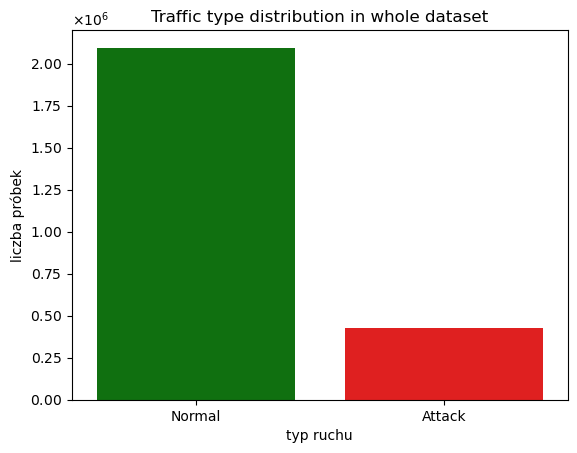

In [16]:
### plot distrtibution of Normal traffic and Attacks in the whole dataset 

#from matplotlib.ticker import StrMethodFormatter, MultipleLocator
#fmt = StrMethodFormatter("{x:,}")  #below lines are just another approach on formatting yaxis
#ax = plt.gca()
#locator = MultipleLocator(1*10**5)
#ax.yaxis.set_major_locator(locator)
#ax.yaxis.set_major_formatter(fmt)
plt.ticklabel_format(axis='y', useMathText=True, useOffset=False)  # change def ScalarFormatter

sns.countplot(x="traffic type", data=all_data, palette=["g","r"])
plt.title("Traffic type distribution in whole dataset")
plt.xlabel("typ ruchu")
plt.ylabel("liczba próbek")
# plt.savefig("distribution1.png", dpi=200, format='png')
plt.show()

In [17]:
# TRAFFIC UNDERSAMPLING

### Normal traffic greatly outweights Evil traffic. To avoid for the model to be biased towards one type of traffic, it has to be downsampled
all_data.loc[:, "traffic type"].value_counts()

## DOWNSAMPLING
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=10, sampling_strategy=0.85) # equals traffic unless ratio is specified


all_data.drop(["traffic type"], axis=1, inplace=True) # temporarily rm the categorical column for underSampling

# all_data_res, trf_type_res = rus.fit_sample(all_data, trf_type)
all_data_res, trf_type_res = rus.fit_resample(all_data, trf_type)

#all_datav2 = pd.concat([all_data_res, trf_type_res], join="inner")  # another way to join dataframe w/ series
all_datav2 = all_data_res.join(trf_type_res, how="inner")

all_datav2.shape # check if resulting DaraFrame valid

(926612, 72)

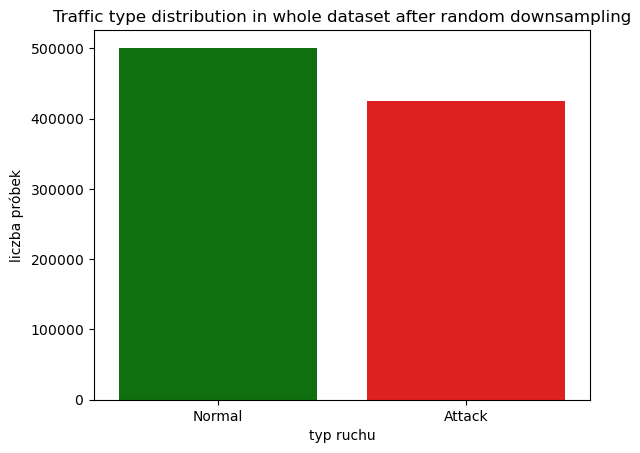

In [18]:
### show distribution chart after downsampling huge Normal traffic 

plt.ticklabel_format(axis='y', useMathText=True, useOffset=False)  # change def ScalarFormatter
sns.countplot(x="traffic type", data=all_datav2, order=["Normal", "Attack"],  palette=["g","r"])

plt.title("Traffic type distribution in whole dataset after random downsampling")
plt.xlabel("typ ruchu")
plt.ylabel("liczba próbek")
# plt.savefig("distribution2.png", dpi=200, format='png')
plt.show()

In [19]:
limit = round(2520798*85/100) # split the dataset into 2 part: 85% for train and val; 15% to test
train_val = all_data[1:limit] # 2016637 rows - first index 1, last index 2045377	

test = all_data[limit:2520798] # 504160 rows - first index 2045378, last index 2572639
# test
# train_val

In [20]:
# Split into input and output - train_val dataset
X = train_val.drop(columns=['Label'])
y = train_val['Label']

In [21]:
# Split into input and output - test dataset
X_test = test.drop(columns=['Label'])
y_test = test['Label']

In [22]:
y.unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Brute Force', 'XSS', 'Sql Injection', 'Infiltration', 'DDoS'],
      dtype=object)

In [23]:
# Create train and val data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (train 80%, test 20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train a model
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_val)

# Report
print(classification_report(y_val, y_pred))

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

                  precision    recall  f1-score   support

          BENIGN       0.97      0.98      0.98    361886
     Brute Force       0.00      0.00      0.00       289
            DDoS       0.81      0.86      0.83     25641
   DoS GoldenEye       0.79      0.69      0.74      2030
        DoS Hulk       0.96      0.80      0.87     34568
DoS Slowhttptest       0.32      0.69      0.43      1078
   DoS slowloris       0.39      0.37      0.38      1075
     FTP-Patator       0.93      0.64      0.76      1173
    Infiltration       0.00      0.00      0.00         5
     SSH-Patator       0.77      0.91      0.83       642
   Sql Injection       0.00      0.00      0.00         7
             XSS       0.00      0.00      0.00       142

        accuracy                           0.96    428536
       macro avg       0.50      0.49      0.49    428536
    weighted avg       0.96      0.96      0.95    428536



c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# from sklearn.tree import DecisionTreeClassifier

# # Train model
# tree_model = DecisionTreeClassifier(max_depth = 30, 
#                                     min_samples_split=200, 
#                                     min_samples_leaf=200, 
#                                     criterion = 'entropy', 
#                                     random_state=42)
# tree_model.fit(X_train, y_train)

# y_pred_tree = tree_model.predict(X_val)

In [26]:
# print('Accuracy score: %.2f' % accuracy_score(y_val, y_pred_tree))
# print('Precision score: %.2f' % precision_score(y_val, y_pred_tree))
# print('Recall score: %.2f' % recall_score(y_val, y_pred_tree))
# print('F1 score: %.2f' % f1_score(y_val, y_pred_tree))